In [4]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib .pyplot as plt
import librosa
import librosa.display
import warnings
warnings.filterwarnings('ignore')
import IPython.display as ipd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import utils
import os
import soundfile as sf
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D,LSTM
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D,GlobalAveragePooling2D

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from IPython.display import SVG, Image
from livelossplot import PlotLossesKeras
from livelossplot.keras import PlotLossesCallback
from sklearn import svm



import tensorflow as tf
print("Tensorflow version:", tf.__version__)


Tensorflow version: 2.9.1


In [19]:
paths = []
labels = []

for dirname, _, filenames in os.walk('C:/Users/kunal/Desktop/CAPSTONE_PROJECT/Demo/Audio Dataset/'):
    for filename in filenames:
        paths.append(os.path.join(dirname,filename))
        labels.append(filename.replace(filename,dirname))
        
         

In [20]:
mainlabels = list(map(lambda x: x.replace('C:/Users/kunal/Desktop/CAPSTONE_PROJECT/Demo/Audio Dataset/Angry', 'Angry'), labels))
mainlabels1 = list(map(lambda x: x.replace('C:/Users/kunal/Desktop/CAPSTONE_PROJECT/Demo/Audio Dataset/Disgust', 'Disgust'), mainlabels))
mainlabels2 = list(map(lambda x: x.replace('C:/Users/kunal/Desktop/CAPSTONE_PROJECT/Demo/Audio Dataset/Fear', 'Fear'), mainlabels1))
mainlabels3 = list(map(lambda x: x.replace('C:/Users/kunal/Desktop/CAPSTONE_PROJECT/Demo/Audio Dataset/Happy', 'Happy'), mainlabels2))
mainlabels4 = list(map(lambda x: x.replace('C:/Users/kunal/Desktop/CAPSTONE_PROJECT/Demo/Audio Dataset/Neutral', 'Neutral'), mainlabels3))
mainlabels5 = list(map(lambda x: x.replace('C:/Users/kunal/Desktop/CAPSTONE_PROJECT/Demo/Audio Dataset/Sad', 'Sad'), mainlabels4))
mainlabels6 = list(map(lambda x: x.replace('C:/Users/kunal/Desktop/CAPSTONE_PROJECT/Demo/Audio Dataset/Surprise', 'Surprise'), mainlabels5))

print(mainlabels6)

['Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 

In [21]:
df = pd.DataFrame()
df['speech']=paths
df['label']=mainlabels6
df.head(10)
print(df['label'])

0          Angry
1          Angry
2          Angry
3          Angry
4          Angry
          ...   
4970    Surprise
4971    Surprise
4972    Surprise
4973    Surprise
4974    Surprise
Name: label, Length: 4975, dtype: object


In [57]:
a = pd.DataFrame()
a['label'] = df['label'].value_counts()
print(a)

          label
Neutral     819
Angry       817
Sad         726
Fear        708
Happy       682
Surprise    653
Disgust     570


Text(0, 0.5, '# Audios')

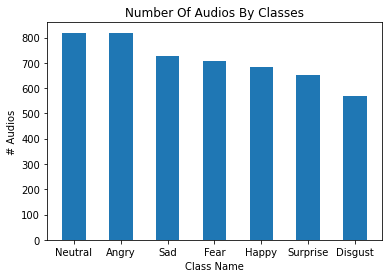

In [56]:
import matplotlib.pyplot as plt

plt.bar(a.index,a['label'],width = .5)
plt.title('Number Of Audios By Classes')
plt.xlabel('Class Name')
plt.ylabel('# Audios')
# plt.bar(df['label'].values,color ='maroon',height=.10,
#         width = 0.4)

In [25]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()
    
def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()
    


In [26]:
from IPython.display import Audio

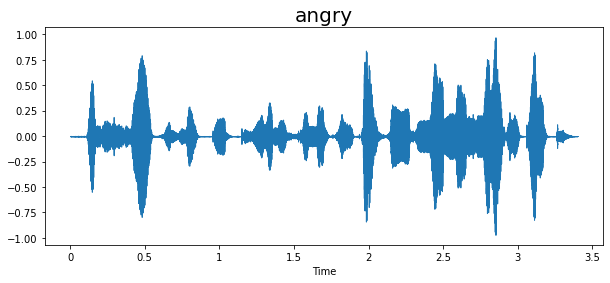

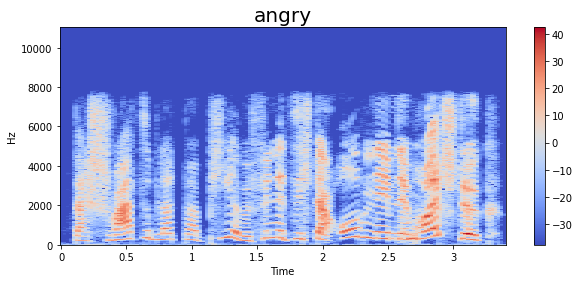

In [27]:
#we can also disply waveplot and specsplot for all the classes  

emotion='angry'
path=df.iat[30,0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


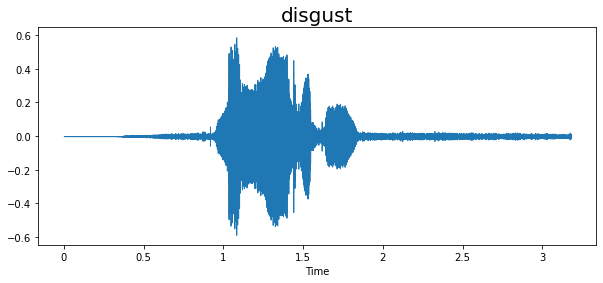

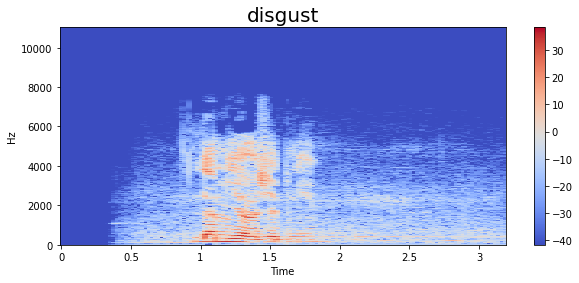

In [28]:
emotion='disgust'
path=df.iat[819,0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


# Augmentation

In [29]:
#adding background noise
def add_white_noise(signal, noise_factor):
    noise = np.random.normal(0,signal.std(),signal.size)
    augmented_data = signal + noise_factor * noise
    # Cast back to same data type
    return augmented_data


In [84]:
if __name__ =="__main__":
    signal,sr = librosa.load(df['speech'][30])
    augmented_signal = add_white_noise(signal,0.5)
    sf.write("augg1.wav",augmented_signal,sr)
   

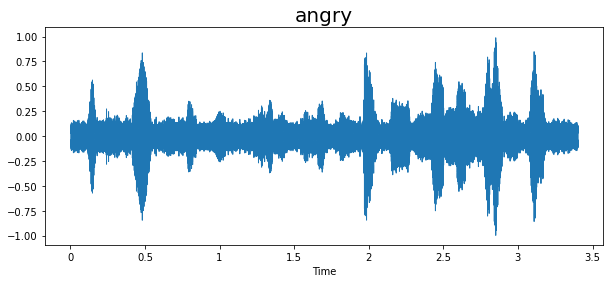

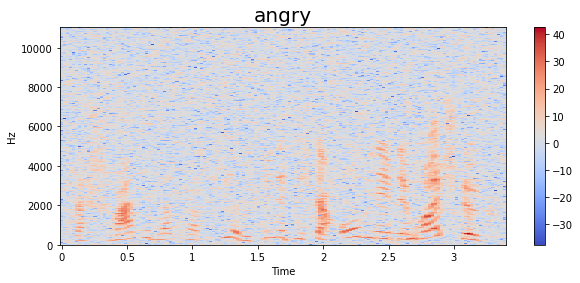

In [85]:
emotion='angry'
data,sampling_rate = librosa.load("augg1.wav")
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio("augg1.wav")

In [86]:
#time scaling
def time_stretch(df,stretch_rate):
    return librosa.effects.time_stretch(df,stretch_rate)


In [87]:
if __name__ =="__main__":
    df,sr = librosa.load(df['speech'][30])
    augmented_signal = time_stretch(df,0.5)
    sf.write("augg2.wav",augmented_signal,sr)
   

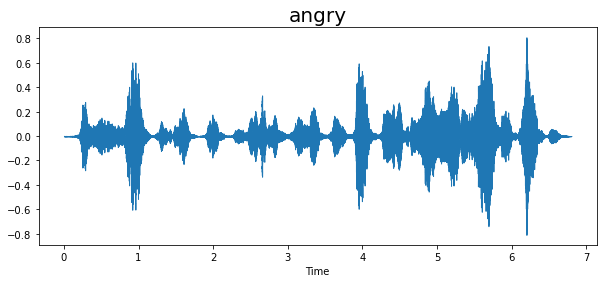

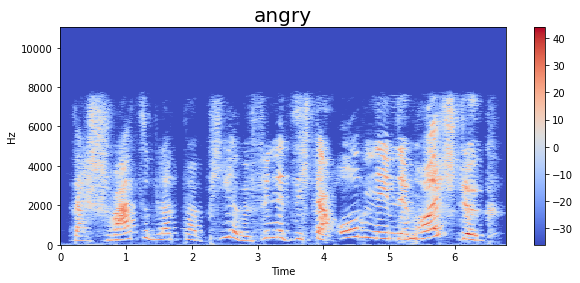

In [88]:
emotion='angry'
data,sampling_rate = librosa.load("augg2.wav")
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio("augg2.wav")

In [89]:
#pitch scaling
def pitch_scale(signal,sr,num_semitones):
    return librosa.effects.pitch_shift(signal,sr,num_semitones)

In [90]:
if __name__ =="__main__":
    df,sr = librosa.load('4-m-20-0-2-148.wav')
    augmented_signal = pitch_scale(df,sr,12)
    sf.write("augg3.wav",augmented_signal,sr)

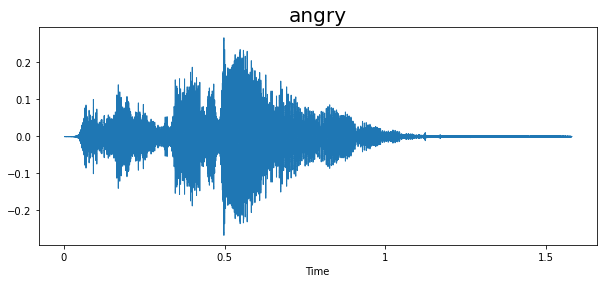

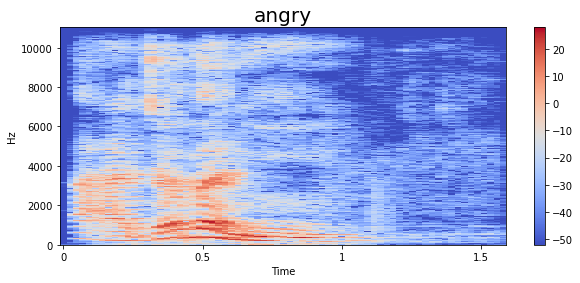

In [91]:
emotion='angry'
data,sampling_rate = librosa.load("augg3.wav")
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio("augg3.wav")


In [92]:
#Random gain scaling
import random
def randomg_gain(df,min_gain_factor,max_gain_factor):
    gain_factor = random.uniform(min_gain_factor,max_gain_factor)
    return df * gain_factor

In [93]:
if __name__ =="__main__":
    df,sr = librosa.load('4-m-20-0-2-148.wav')
    augmented_signal = randomg_gain(df,2,6)
    sf.write("augg4.wav",augmented_signal,sr)

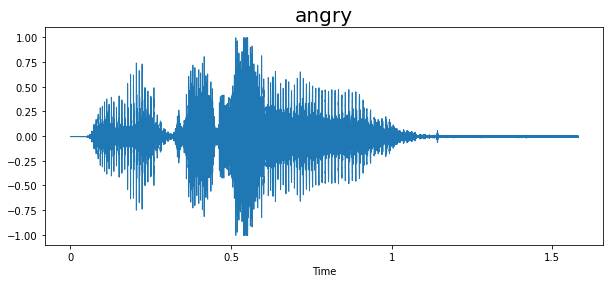

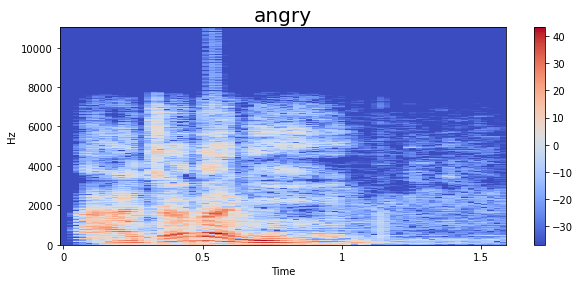

In [94]:
data,sampling_rate = librosa.load("augg4.wav")
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio("augg4.wav")


In [30]:
def extract_mfcc(filename):
    y,sr = librosa.load(filename,duration=3,offset=0.5,res_type='kaiser_fast')
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [31]:
extract_mfcc(df['speech'][0])

array([-4.34857483e+02,  1.13806709e+02, -2.80842819e+01,  4.67693253e+01,
       -6.62312090e-01, -1.22168455e+01, -3.68304205e+00, -1.18129387e+01,
       -4.91973448e+00, -2.17101002e+00, -2.66553521e+00, -3.58675003e-01,
       -4.21081638e+00, -9.79485893e+00,  3.86956286e+00, -1.29496419e+00,
       -3.73397255e+00,  9.94346559e-01,  4.32907313e-01, -2.85805488e+00,
       -7.83589125e+00,  1.40436316e+00, -3.91935897e+00, -4.38161612e+00,
        1.18947923e-01, -3.20929813e+00,  1.27311492e+00,  2.34517217e-01,
       -2.20603156e+00, -6.29029870e-01, -1.64104924e-01, -4.18164444e+00,
        4.02298361e-01,  1.11620665e+00, -5.15712023e+00, -1.99951541e+00,
       -3.78106952e+00, -4.57532406e+00, -4.08243942e+00, -4.15722179e+00],
      dtype=float32)

In [32]:
X_mfcc = df['speech'].apply(lambda x:extract_mfcc(x))
X_mfcc

0       [-434.85748, 113.80671, -28.084282, 46.769325,...
1       [-480.92023, 99.43582, -35.67968, 65.717094, 1...
2       [-226.69179, 95.11993, -73.66531, 41.528965, -...
3       [-240.40167, 94.57178, -58.944378, 54.096592, ...
4       [-282.79556, 103.31378, -68.86788, 38.481617, ...
                              ...                        
4970    [-262.84146, 115.41763, -2.5604851, 28.536448,...
4971    [-326.23785, 94.4351, 8.209972, 30.855536, -8....
4972    [-301.2211, 81.24696, 0.19075781, 29.471455, 1...
4973    [-262.14603, 98.11836, -5.5850673, 35.08944, -...
4974    [-280.18356, 75.58335, 10.810878, 33.449093, -...
Name: speech, Length: 4975, dtype: object

In [33]:
X=[x for x in X_mfcc]
X=np.array(X)
X.shape

(4975, 40)

In [34]:
X = np.expand_dims(X,-1)
X.shape

(4975, 40, 1)

In [35]:
# to categoriacl
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['label']])

In [36]:
y=y.toarray()

In [37]:
y.shape

(4975, 7)

In [38]:
from sklearn.model_selection import train_test_split

# x_train ,x_test,y_train,y_test = train_test_split(df,test_size=0.2)   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [39]:
model = Sequential()

model.add(Conv2D(40,(3,3),padding='same',input_shape=(40,1,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Dropout(0.25))
          
          
model.add(Conv2D(128,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Dropout(0.25))
          
          
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Dropout(0.25))
          

model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Dropout(0.25))
          
model.add(Flatten()) 
          
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))          
          

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))          
          

          
model.add(Dense(7,activation='softmax'))
opt = Adam(lr=0.0005)


checkpoint = ModelCheckpoint("Audio.h5",monitor='val_accuracy',
                            save_weights_only=True,mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.1,model='auto')

callbacks=[PlotLossesCallback(),checkpoint,reduce_lr]
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()          

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 1, 40)         400       
                                                                 
 batch_normalization (BatchN  (None, 40, 1, 40)        160       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 40, 1, 40)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 1, 40)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 40, 1, 40)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 1, 128)        1

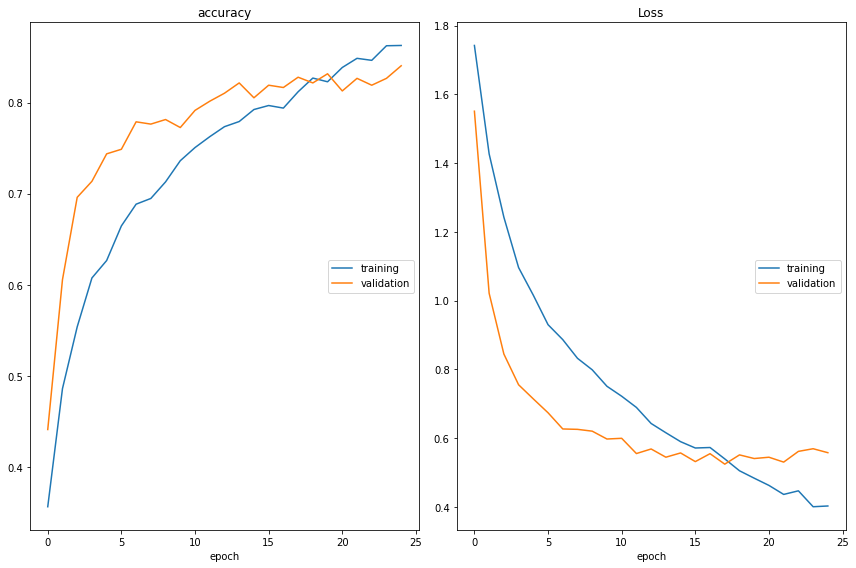

accuracy
	training         	 (min:    0.356, max:    0.863, cur:    0.863)
	validation       	 (min:    0.441, max:    0.840, cur:    0.840)
Loss
	training         	 (min:    0.400, max:    1.742, cur:    0.402)
	validation       	 (min:    0.524, max:    1.551, cur:    0.557)

Epoch 25: saving model to Audio.h5
319/319 [==============================] - 38s 119ms/step - loss: 0.4023 - accuracy: 0.8628 - val_loss: 0.5574 - val_accuracy: 0.8405 - lr: 5.0000e-04


In [41]:
history=model.fit(X_train,y_train,validation_split=0.2,epochs=25,batch_size=10,shuffle=True,callbacks=callbacks)


In [42]:
model.save('audio_model_86_28.h5')

In [43]:
test_loss, test_acc = model.evaluate(X_test, y_test)

32/32 [==============================] - 1s 41ms/step - loss: 0.5810 - accuracy: 0.8131


In [44]:
y_pred = model.predict(X_test)

y_pred

32/32 [==============================] - 1s 41ms/step


array([[1.7643411e-05, 3.6246650e-04, 6.7676949e-05, ..., 1.7420283e-04,
        3.9072847e-06, 9.9674594e-01],
       [6.1232829e-05, 8.5658450e-03, 7.8038698e-05, ..., 7.7218976e-04,
        2.8654618e-05, 2.9550150e-02],
       [6.8425564e-03, 6.2426072e-05, 1.0002904e-03, ..., 9.2944218e-04,
        1.7879324e-04, 2.2922012e-03],
       ...,
       [9.5078931e-06, 1.6980235e-06, 8.1525548e-05, ..., 9.9988413e-01,
        1.7364271e-06, 1.9557267e-07],
       [8.6589229e-05, 3.7677756e-03, 9.1647846e-01, ..., 2.1275651e-05,
        5.2196981e-04, 1.1450874e-03],
       [6.5135857e-05, 2.9013225e-05, 8.1386952e-06, ..., 5.7799922e-04,
        9.9357092e-01, 3.8269327e-03]], dtype=float32)

In [46]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
from sklearn import metrics



y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)



32/32 [==============================] - 1s 42ms/step
[[142   9   5   6   3   3   3]
 [  2  93   3   4  11   1   5]
 [  1   1  96   1   7   7   1]
 [  6   4   4 123   4   6   2]
 [  4   0  10   2 139   0   4]
 [  1   3   4   2   8 128   8]
 [  7   7   8   8  10   1  88]]


<AxesSubplot:>

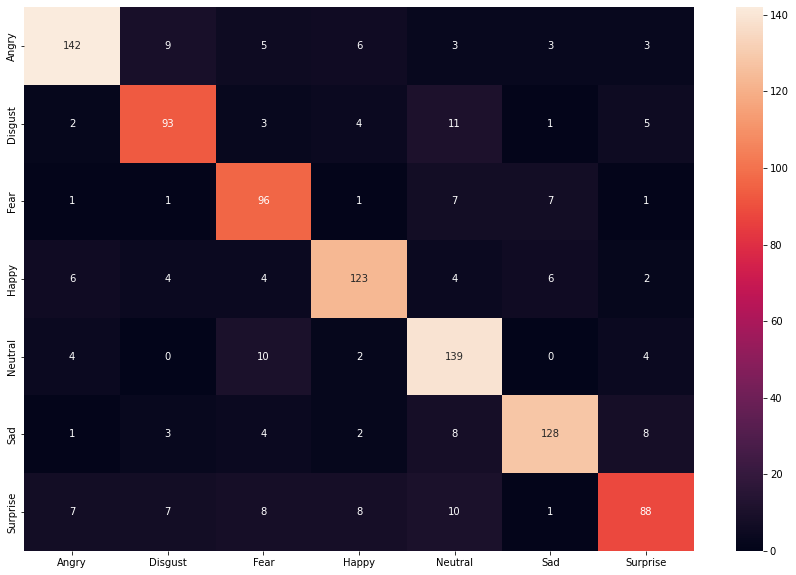

In [48]:
df_cm = pd.DataFrame(cm, index = ("Angry", "Disgust","Fear","Happy","Neutral","Sad","Surprise"), columns = ("Angry", "Disgust","Fear","Happy","Neutral","Sad","Surprise"))
plt.figure(figsize = (15, 10))
sns.heatmap(df_cm, annot = True, fmt ='g')

In [49]:
# Print the accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("f1 Score : ",f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))

0.8130653266331658
Precision Score :  0.8130653266331658
Recall Score :  0.8130653266331658
f1 Score :  0.8130653266331659
